# Tagging ang Chunking

# 1. POS Tagging

Since one document is too long to observe a parsed structure, lets use one short sentence for each language.

In [23]:
import nltk

In [24]:
#E
tokens = "The little yellow dog barked at the Persian cat".split()
print(tokens)
tags_en = nltk.pos_tag(tokens)
tags_en

['The', 'little', 'yellow', 'dog', 'barked', 'at', 'the', 'Persian', 'cat']


[('The', 'DT'),
 ('little', 'JJ'),
 ('yellow', 'JJ'),
 ('dog', 'NN'),
 ('barked', 'VBD'),
 ('at', 'IN'),
 ('the', 'DT'),
 ('Persian', 'JJ'),
 ('cat', 'NN')]

In [25]:
# K 트위터
from konlpy.tag import Twitter
t = Twitter()
print(t.morphs("작고 노란 강아지가 페르시안 고양이에게 짖었다"))
tags_ko = t.pos("작고 노란 강아지가 페르시안 고양이에게 짖었다")
tags_ko

['작고', '노란', '강아지', '가', '페르시안', '고양이', '에게', '짖었', '다']


[('작고', 'Noun'),
 ('노란', 'Adjective'),
 ('강아지', 'Noun'),
 ('가', 'Josa'),
 ('페르시안', 'Noun'),
 ('고양이', 'Noun'),
 ('에게', 'Josa'),
 ('짖었', 'Noun'),
 ('다', 'Josa')]

In [26]:
# K 꼬꼬마
from konlpy.tag import Kkma
import re #정규표현식 부르는 것
kkma = Kkma()

string = "작고 노란 강아지가 페르시안 고양이에게 짖었다"
print(kkma.morphs(string))
kkma.pos(string)#string에 pos tagger를 적용한다

['작고', '노', '이', '란', '강아지', '가', '페르', '시안', '고양이', '에게', '짖', '었', '다']


[('작고', 'NNG'),
 ('노', 'NNG'),
 ('이', 'VCP'),
 ('란', 'ETD'),
 ('강아지', 'NNG'),
 ('가', 'JKS'),
 ('페르', 'NNG'),
 ('시안', 'NNP'),
 ('고양이', 'NNG'),
 ('에게', 'JKM'),
 ('짖', 'VV'),
 ('었', 'EPT'),
 ('다', 'EFN')]

In [30]:
# K 꼬꼬마
from konlpy.tag import Kkma
import re #정규표현식 부르는 것
kkma = Kkma()

string = "벚꽃의 꽃말은 중간고사"
print(kkma.morphs(string))
kkma.pos(string)#string에 pos tagger를 적용한다

['벚꽃', '의', '꽃말', '은', '중간고사']


[('벚꽃', 'NNG'), ('의', 'JKG'), ('꽃말', 'NNG'), ('은', 'JX'), ('중간고사', 'NNG')]

In [39]:
string.split(" ")

['벚꽃의', '꽃말은', '중간고사']

In [35]:
token = [kkma.pos(morph) for morph in string.split(" ")] #" " 나 ' ' 나 같은 결과 ~
token

[[('벚꽃', 'NNG'), ('의', 'JKG')],
 [('꽃말', 'NNG'), ('은', 'JX')],
 [('중간고사', 'NNG')]]

In [36]:
# 같은 내용 다른 코드 : 그러나 위의 방법이 파이썬스러운 방법..

token_list = []
for morph in string.split(" "): #string을 tokenize 한다. 반드시 " " 한칸 띈다.
    token_list.append(kkma.pos(morph)) #형태소 분석 kkma.pos()

token_list

[[('벚꽃', 'NNG'), ('의', 'JKG')],
 [('꽃말', 'NNG'), ('은', 'JX')],
 [('중간고사', 'NNG')]]

In [37]:
#Tokenizing 한 결과에서 명사만 추출
token = sum(token, []) #따로 따로 list를 하나의 list로 묶어 준다.
print(token)

Noun_list = [morph for morph in token if morph[1].find('NN')==0]
print("최종 명사 추출")
Noun_list

[('벚꽃', 'NNG'), ('의', 'JKG'), ('꽃말', 'NNG'), ('은', 'JX'), ('중간고사', 'NNG')]
최종 명사 추출


[('벚꽃', 'NNG'), ('꽃말', 'NNG'), ('중간고사', 'NNG')]

In [38]:
print(token[1])
print(token[1][1])

('의', 'JKG')
JKG


# * 꼬꼬마, 트위터, 코모란 비교해보기

In [40]:
import time
from konlpy.tag import Kkma, Twitter, Komoran

In [41]:
# 왓챠 플레이의 영화 리뷰 데이터
texts = ['영화가 아니라 영상으로 예술을 만든 작품 이다지도 소박한 주제에 숨이 막힐 듯 한 우아함이라니',
       '옛날 sf영화의 장점 이해하기 쉽고 단순하며 유쾌하다',
       '내게 남는건 슈퍼맨 뿐이다 잘생긴 슈퍼맨 완벽한 로맨티스트 슈퍼맨 별에서 온 슈퍼맨 굳이 의미를 더하자면 좋은 사람이랑 처음으로 같이 본 영화라는거 그럼에도 도저히 쉴드를 칠 수 없을 정도로 노잼이었단게 아쉬울 따름이다']

In [43]:
pos_taggers = [('kkma', Kkma()), ('twitter', Twitter()), ('Komoran', Komoran())]
results = []
for name, tagger in pos_taggers:
    tokens = []
    process_time = time.time()
    for text in texts:
        tokens.append(tagger.pos(text))
    process_time = time.time() - process_time
    print('tagger name = %10s, %.3f secs' % (name, process_time))
    results.append(tokens)

tagger name =       kkma, 0.698 secs
tagger name =    twitter, 0.017 secs
tagger name =    Komoran, 6.421 secs


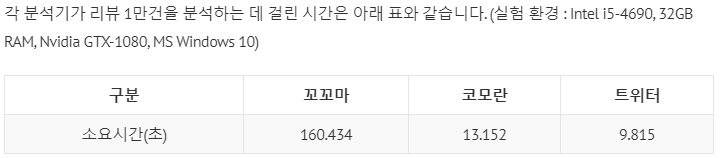

In [47]:
results[0] #kkma

[[('영화', 'NNG'),
  ('가', 'JKC'),
  ('아니', 'VCN'),
  ('라', 'ECD'),
  ('영상', 'NNG'),
  ('으로', 'JKM'),
  ('예술', 'NNG'),
  ('을', 'JKO'),
  ('만들', 'VV'),
  ('ㄴ', 'ETD'),
  ('작품', 'NNG'),
  ('이', 'VCP'),
  ('다', 'ECS'),
  ('지도', 'NNG'),
  ('소박', 'NNG'),
  ('하', 'XSV'),
  ('ㄴ', 'ETD'),
  ('주제', 'NNG'),
  ('에', 'JKM'),
  ('숨', 'NNG'),
  ('이', 'JKS'),
  ('막히', 'VV'),
  ('ㄹ', 'ETD'),
  ('듯', 'NNB'),
  ('한', 'MDN'),
  ('우', 'NNG'),
  ('아함', 'NNP'),
  ('이', 'VCP'),
  ('라니', 'EFQ')],
 [('옛날', 'NNG'),
  ('sf', 'OL'),
  ('영화', 'NNG'),
  ('의', 'JKG'),
  ('장점', 'NNG'),
  ('이해', 'NNG'),
  ('하', 'XSV'),
  ('기', 'ETN'),
  ('쉽', 'VA'),
  ('고', 'ECE'),
  ('단순', 'NNG'),
  ('하', 'XSV'),
  ('며', 'ECE'),
  ('유쾌', 'XR'),
  ('하', 'XSA'),
  ('다', 'EFN')],
 [('내', 'VV'),
  ('게', 'ECD'),
  ('남', 'VV'),
  ('는', 'ETD'),
  ('것', 'NNB'),
  ('은', 'JKS'),
  ('슈퍼맨', 'NNG'),
  ('뿐', 'NNB'),
  ('이', 'VCP'),
  ('다', 'EFN'),
  ('잘생기', 'VV'),
  ('ㄴ', 'ETD'),
  ('슈퍼맨', 'NNG'),
  ('완벽', 'NNG'),
  ('하', 'XSV'),
  ('ㄴ', 'ETD'),
  (

In [49]:
results[1] # twitter

[[('영화', 'Noun'),
  ('가', 'Josa'),
  ('아니', 'Adjective'),
  ('라', 'Eomi'),
  ('영상', 'Noun'),
  ('으로', 'Josa'),
  ('예술', 'Noun'),
  ('을', 'Josa'),
  ('만든', 'Verb'),
  ('작품', 'Noun'),
  ('이다지', 'Noun'),
  ('도', 'Josa'),
  ('소박한', 'Adjective'),
  ('주제', 'Noun'),
  ('에', 'Josa'),
  ('숨', 'Noun'),
  ('이', 'Josa'),
  ('막힐', 'Verb'),
  ('듯', 'Noun'),
  ('한', 'Verb'),
  ('우아함', 'Adjective'),
  ('이라니', 'Eomi')],
 [('옛날', 'Noun'),
  ('sf', 'Alpha'),
  ('영화', 'Noun'),
  ('의', 'Josa'),
  ('장점', 'Noun'),
  ('이해하기', 'Verb'),
  ('쉽', 'Verb'),
  ('고', 'Eomi'),
  ('단순하며', 'Adjective'),
  ('유쾌하', 'Noun'),
  ('다', 'Josa')],
 [('내게', 'Verb'),
  ('남는', 'Verb'),
  ('건', 'Eomi'),
  ('슈퍼맨', 'Noun'),
  ('뿐', 'Noun'),
  ('이다', 'Josa'),
  ('잘생긴', 'Adjective'),
  ('슈퍼맨', 'Noun'),
  ('완벽한', 'Adjective'),
  ('로맨', 'Noun'),
  ('티스', 'Noun'),
  ('트', 'Noun'),
  ('슈퍼맨', 'Noun'),
  ('별', 'Noun'),
  ('에서', 'Josa'),
  ('온', 'Noun'),
  ('슈퍼맨', 'Noun'),
  ('굳이', 'Noun'),
  ('의미', 'Noun'),
  ('를', 'Josa'),
  ('더하자', 'Verb')

In [50]:
results[2] # komoran

[[('영화', 'NNG'),
  ('가', 'JKS'),
  ('아니', 'VCN'),
  ('라', 'EC'),
  ('영상', 'NNG'),
  ('으로', 'JKB'),
  ('예술', 'NNG'),
  ('을', 'JKO'),
  ('만들', 'VV'),
  ('ㄴ', 'ETM'),
  ('작품', 'NNG'),
  ('이다지', 'MAG'),
  ('도', 'JX'),
  ('소박', 'XR'),
  ('하', 'XSA'),
  ('ㄴ', 'ETM'),
  ('주제', 'NNG'),
  ('에', 'JKB'),
  ('숨', 'NNG'),
  ('이', 'JKS'),
  ('막히', 'VV'),
  ('ㄹ', 'ETM'),
  ('듯', 'NNB'),
  ('한', 'MM'),
  ('우아', 'XR'),
  ('하', 'XSA'),
  ('ㅁ', 'ETN'),
  ('이', 'VCP'),
  ('라니', 'EC')],
 [('옛날', 'NNG'),
  ('sf', 'SL'),
  ('영화', 'NNG'),
  ('의', 'JKG'),
  ('장점', 'NNG'),
  ('이해', 'NNG'),
  ('하', 'XSV'),
  ('기', 'ETN'),
  ('쉽', 'VA'),
  ('고', 'EC'),
  ('단순', 'XR'),
  ('하', 'XSA'),
  ('며', 'EC'),
  ('유쾌', 'XR'),
  ('하', 'XSA'),
  ('다', 'EC')],
 [('내', 'VV'),
  ('게', 'EC'),
  ('남', 'VV'),
  ('는', 'ETM'),
  ('건', 'NNB'),
  ('슈퍼맨', 'NNP'),
  ('뿐', 'NNB'),
  ('이', 'VCP'),
  ('다', 'EC'),
  ('잘생기', 'VA'),
  ('ㄴ', 'ETM'),
  ('슈퍼맨', 'NNP'),
  ('완벽', 'NNG'),
  ('하', 'XSV'),
  ('ㄴ', 'ETM'),
  ('로', 'NNG'),
  ('맨', 'XPN')

# 2. Noun phrase chunking(덩이짓기)

* nltk.RegexpParser() is a great way to start chunking.
* 같은 의미 단위를 한 덩어리로 인지하기
* The little yellow dog barked at the Persian cat
* 작고 노란 강아지가 페르시안 고양이에게 짖었다

nltk.RegexpParser(grammar)
#### Define a chunk grammar, or chunking rules, then chunk
* grammar = """
* NP: {<N.*>*<Suffix>?}   # Noun phrase  # 명사가 연속적으로 등장한 후 접미사(suffix)가 선택적으로 붙은 경우 명사구(NP)
* VP: {<V.*>*}            # Verb phrase
* AP: {<A.*>*}            # Adjective phrase
* """

In [51]:
#E
parser_en = nltk.RegexpParser("NP: {<DT>?<JJ>?<NN.*>*}")
chunks_en = parser_en.parse(tags_en)
chunks_en.draw()

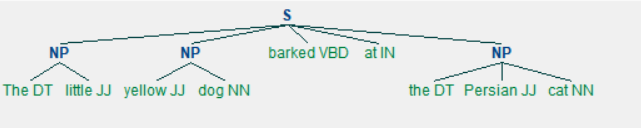

In [52]:
# K
parser_ko = nltk.RegexpParser("NP: {<Adjective>*<Noun>*}")
chunks_ko = parser_ko.parse(tags_ko)
chunks_ko.draw()

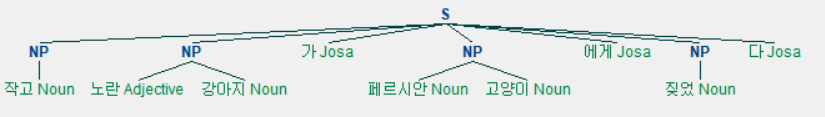